# **Breathing the City: An In-depth Exploration of Delhi's Air Quality**

### **About the dataset:**

The dataset provided contains air quality measurements for Delhi during January 2023. The dataset includes the following variables:

- date: Date and time of the measurement.
- co: Concentration of Carbon Monoxide (CO) in µg/m³.
- no: Concentration of Nitric Oxide (NO) in µg/m³.
- no2: Concentration of Nitrogen Dioxide (NO2) in µg/m³.
- o3: Concentration of Ozone (O3) in µg/m³.
- so2: Concentration of Sulfur Dioxide (SO2) in µg/m³.
- pm2_5: Concentration of Particulate Matter (PM2.5) in µg/m³.
- pm10: Concentration of Particulate Matter (PM10) in µg/m³.
- nh3: Concentration of Ammonia (NH3) in µg/m³.




In [ ]:
#importing required modules:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
data = pd.read_csv("/content/delhiaqi.csv")
data.head()

date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4  2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  
0   5.83  
1   7.66  
2  11.40  
3  13.55  
4  14.19

In [ ]:
#Summary statistics:
data.describe()

co          no         no2          o3         so2  \
count    561.000000  561.000000  561.000000  561.000000  561.000000   
mean    3814.942210   51.181979   75.292496   30.141943   64.655936   
std     3227.744681   83.904476   42.473791   39.979405   61.073080   
min      654.220000    0.000000   13.370000    0.000000    5.250000   
25%     1708.980000    3.380000   44.550000    0.070000   28.130000   
50%     2590.180000   13.300000   63.750000   11.800000   47.210000   
75%     4432.680000   59.010000   97.330000   47.210000   77.250000   
max    16876.220000  425.580000  263.210000  164.510000  511.170000   

             pm2_5         pm10         nh3  
count   561.000000   561.000000  561.000000  
mean    358.256364   420.988414   26.425062  
std     227.359117   271.287026   36.563094  
min      60.100000    69.080000    0.630000  
25%     204.450000   240.900000    8.230000  
50%     301.170000   340.900000   14.820000  
75%     416.650000   482.570000   26.350000  
max    1310.200000  1499.270000  267.510000

In [ ]:
#Shape:
data.shape

(561, 8)

In [ ]:
#Checking data types of each column:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


In [ ]:
pip install ydata-profiling

In [ ]:
#Pandas profiling
from ydata_profiling import ProfileReport
report=ProfileReport(data)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **Visualisations:**

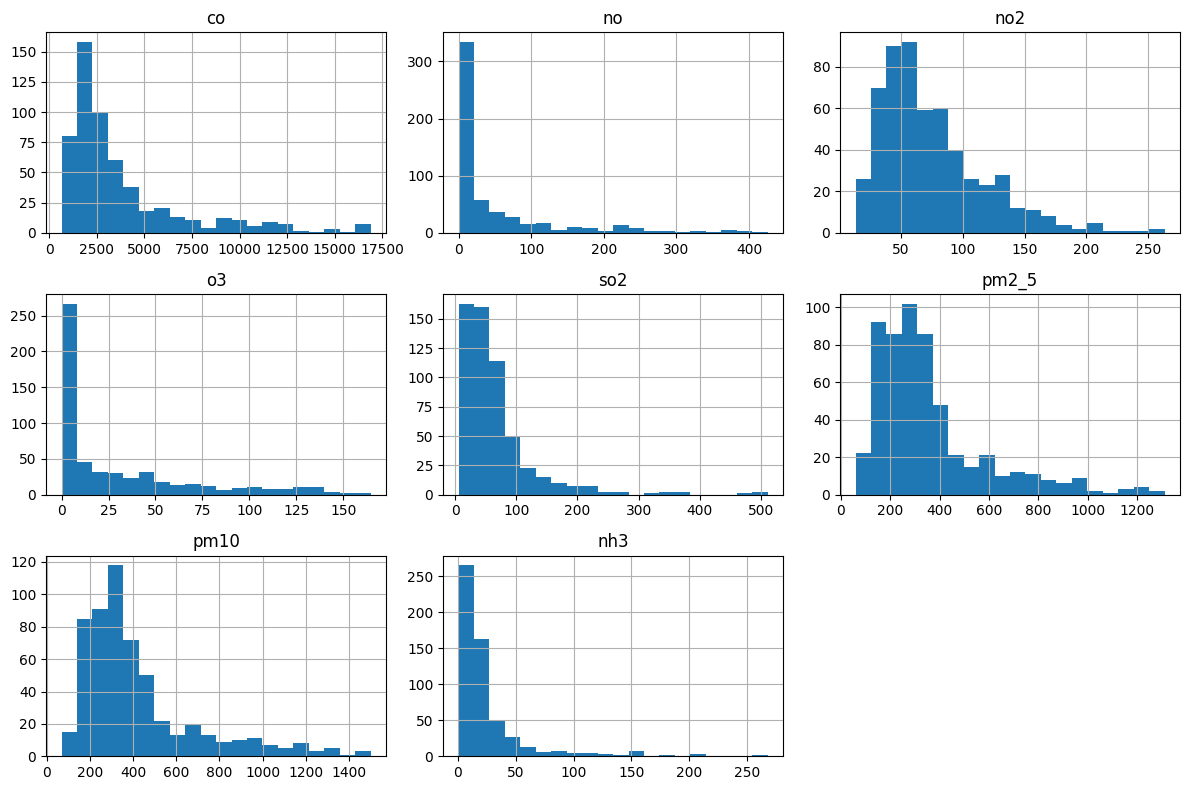

In [ ]:
#Plotting histogram:
data.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

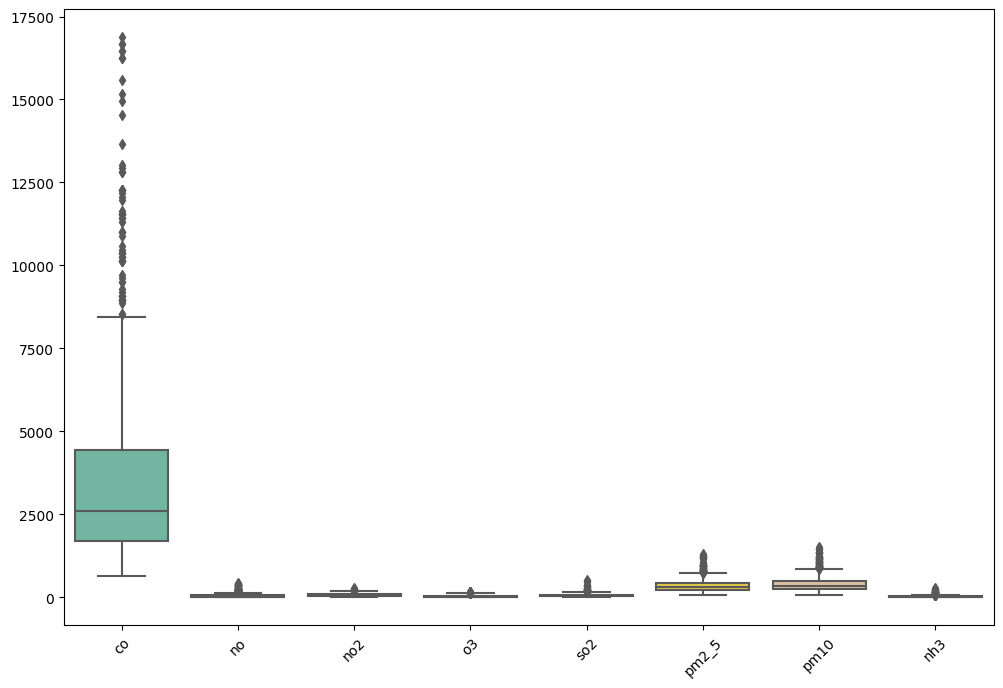

In [ ]:
# Creating Boxplots:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient="v", palette="Set2")
plt.xticks(rotation=45)
plt.show()

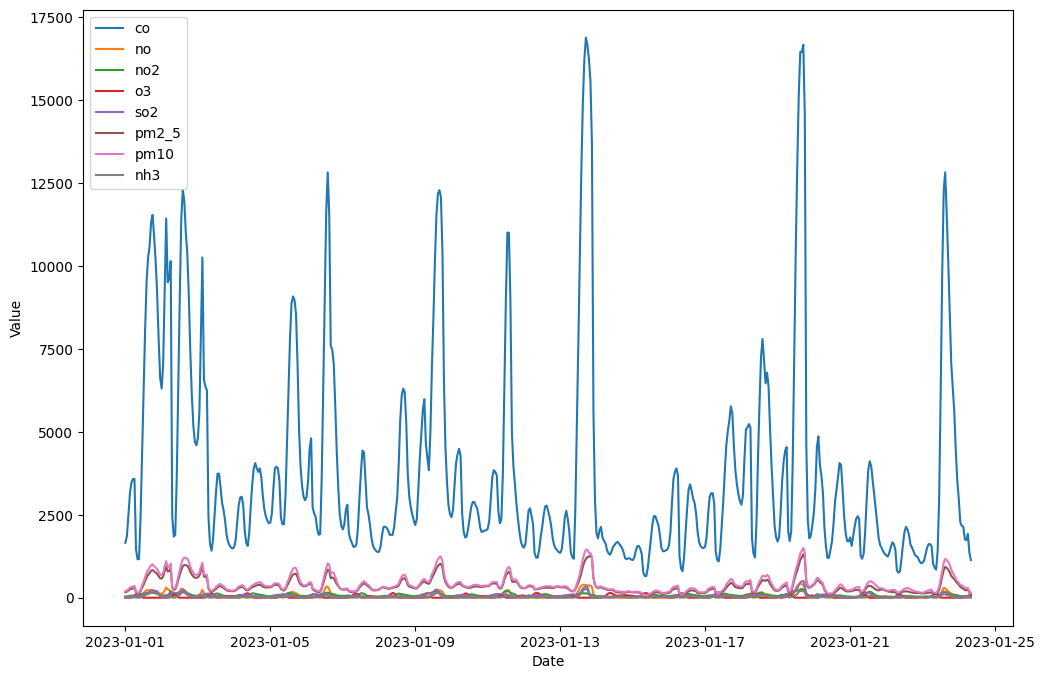

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Creating time series plots for each variable
plt.figure(figsize=(12, 8))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## **Data Preprocessing:**

In [ ]:
#Checking for missing values:
data.isna().sum()

co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [ ]:
#Checking for duplicates:
data.duplicated().sum()

0

In [ ]:
#Detection and removal of outliers column wise:
print('Shape of data before removing outliers:', data.shape)
# Using Interquartile Range
# Detecting outliers:
# Define a function to remove outliers based on IQR for a single column
def remove_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

# List of columns you want to remove outliers from
columns_to_remove_outliers = ['co','no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Apply the remove_outliers_iqr function to each column
for column in columns_to_remove_outliers:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[~((data[column] < lower_bound) | (data[column] > upper_bound))]

print('Shape of data after removing outliers:', data.shape)

Shape of data before removing outliers: (561, 9)
Shape of data after removing outliers: (395, 9)


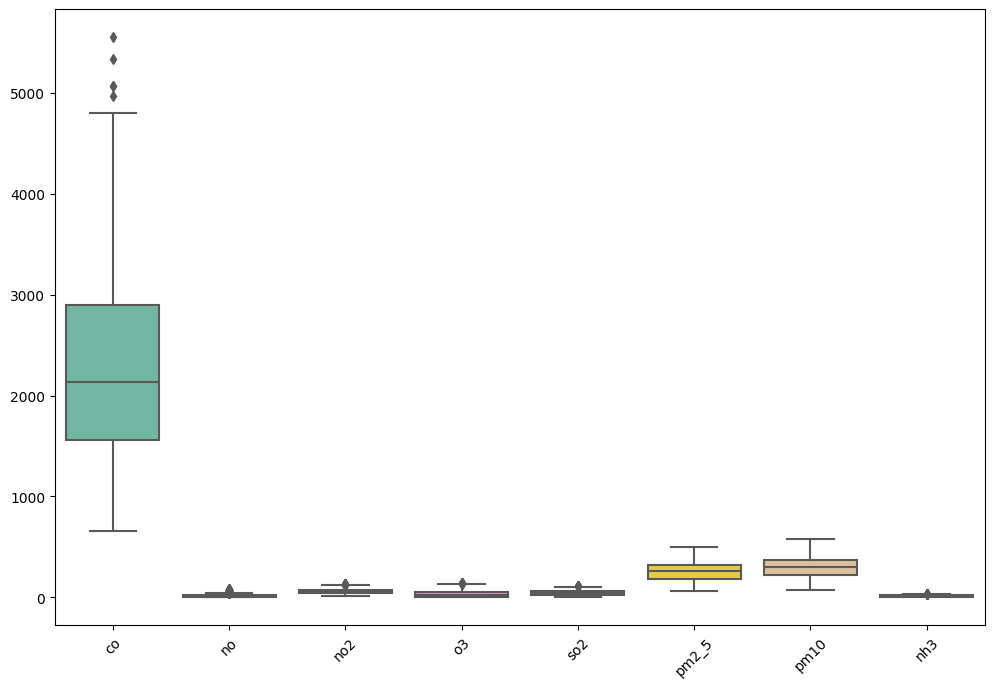

In [ ]:
# Creating Boxplots:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient="v", palette="Set2")
plt.xticks(rotation=45)
plt.show() # We observe the outliers have reduced compared to the previous visualisation

## **Analysis:**

In [ ]:
# Define AQI breakpoints and corresponding AQI values
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]

def calculate_aqi(pollutant_name, concentration):
    for low, high, aqi in aqi_breakpoints:
        if low <= concentration <= high:
            return aqi
    return None

def calculate_overall_aqi(row):
    aqi_values = []
    pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
    for pollutant in pollutants:
        aqi = calculate_aqi(pollutant, row[pollutant])
        if aqi is not None:
            aqi_values.append(aqi)
    return max(aqi_values)

# Calculate AQI for each row
data['AQI'] = data.apply(calculate_overall_aqi, axis=1)

# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
    for low, high, category in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None

# Categorize AQI
data['AQI Category'] = data['AQI'].apply(categorize_aqi)
data.head()

date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4  2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  AQI    AQI Category  
0   5.83  300  Very Unhealthy  
1   7.66  300  Very Unhealthy  
2  11.40  400       Hazardous  
3  13.55  400       Hazardous  
4  14.19  400       Hazardous

In [ ]:
# AQI over time
fig = px.bar(data, x="date", y="AQI",
             title="AQI of Delhi in January")
fig.update_xaxes(title="Date")
fig.update_yaxes(title="AQI")
fig.show()

In [ ]:
fig = px.histogram(data, x="date",
                    color="AQI Category",
                    title="AQI Category Distribution Over Time")
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Count")
fig.show()

In [ ]:
# Define pollutants and their colors
pollutants = ["co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3"]
pollutant_colors = px.colors.qualitative.Plotly

# Calculate the sum of pollutant concentrations
total_concentrations = data[pollutants].sum()

# Create a DataFrame for the concentrations
concentration_data = pd.DataFrame({
    "Pollutant": pollutants,
    "Concentration": total_concentrations
})

# Create a donut plot for pollutant concentrations
fig = px.pie(concentration_data, names="Pollutant", values="Concentration",
             title="Pollutant Concentrations in Delhi",
             hole=0.4, color_discrete_sequence=pollutant_colors)

# Update layout for the donut plot
fig.update_traces(textinfo="percent+label")
fig.update_layout(legend_title="Pollutant")

# Show the donut plot
fig.show()

In [ ]:
# Correlation Between Pollutants
correlation_matrix = data[pollutants].corr()
fig = px.imshow(correlation_matrix, x=pollutants,
                 y=pollutants, title="Correlation Between Pollutants")
fig.show()

In [ ]:
# Extract the hour from the date
data['Hour'] = pd.to_datetime(data['date']).dt.hour

# Calculate hourly average AQI
hourly_avg_aqi = data.groupby('Hour')['AQI'].mean().reset_index()

# Create a line plot for hourly trends in AQI
fig = px.line(hourly_avg_aqi, x='Hour', y='AQI',
              title='Hourly Average AQI Trends in Delhi (Jan 2023)')
fig.update_xaxes(title="Hour of the Day")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
data['date'] = pd.to_datetime(data['date'])
# Create a new column 'Day_of_Week'
data['Day_of_Week'] = data['date'].dt.day_name()
# Calculate average AQI by Day of the Week
average_aqi_by_day = data.groupby('Day_of_Week')['AQI'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fig = px.bar(average_aqi_by_day, x=average_aqi_by_day.index, y='AQI',
              title='Average AQI by Day of the Week')
fig.update_xaxes(title="Day of the Week")
fig.update_yaxes(title="Average AQI")
fig.show()


## **Linear Regression : To predict AQI**

Mean Squared Error (MSE): 1173.0250894987823
Root Mean Squared Error (RMSE): 34.249453856941756
R-squared (R2) Score: 0.8550900715842855


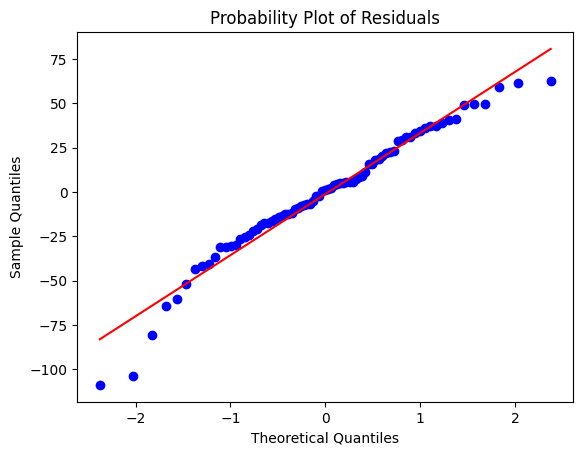

In [ ]:
# import required modules:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the X and y
X = data[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]
y = data['AQI']

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

# Calculate the residuals (differences between predicted and actual values)
residuals = y_test - y_pred

# Create a probability plot (Q-Q plot) for the residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Probability Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

### **Summarising the steps...**

- Data Preprocessing:

    We started by loading the air quality dataset, which included features such as 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', as well as the target variable 'AQI'.<br>
    We performed data preprocessing, which involved handling missing values, ensuring data types were correct, and standardizing or scaling numerical features if necessary.
    We also created additional features like 'Day_of_Week' from the 'date' column to explore weekly patterns in air quality.

- Data Visualization:

    We visualized the data to gain insights into the distribution of air quality parameters, the distribution of AQI values, and potential relationships between features and the target variable.
    Visualization techniques included histograms, scatter plots, box plots, and time series plots to explore temporal patterns.
    We examined correlations between variables to identify potential predictors for the AQI.

- Linear Regression Model:

    To predict AQI, we built a linear regression model using the air quality parameters ('co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3') as input features.
    We split the data into training and testing sets to assess model performance.
    After training the model, we evaluated its performance using key metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score.
    The model achieved an R2 score of approximately 0.8551, indicating that it explains approximately 85.51% of the variance in AQI values.


**What next?**

While the linear regression model shows promising results, there are opportunities for further improvement.
Potential areas for enhancement include feature selection or engineering, exploring more complex models, conducting cross-validation, and assessing model assumptions.
